# Personnel Retention Study

## Abstract

This project examines Personnel Retention in a given institution.  
The goal is to determine the most revelant parameters, how they influence the retention of personnel and a formulation of plan of action.  
Through Exploratory Data Analysis and Machine Learniung Binary Classification Algorithm, some interesting insights were extracted.  
This project has valuable application to the subject of client retention.

## 1. Introduction
This project arose from the need of a certain institution to increase it's personnel retention power.  
Employers where leaving the institution and following seemingly random patterns, from resigning after being moved to a position of desire, to resigning soon after promotion.  
To solve this problem, several ideas came to light, from mouth to mouth inquiries to full statistical inquiries. Both of the methods have one common problem, the subjectivity of individuals feedback/answers.  
Having in mind that numbers and data don't lie, it was decided to conduct a more analytical study of the situation through data analysis and Machine Learning Methods. It is here that this project's role came to life.

## 2. Methodology  
### 2.1. The Data  
The data was sampled from personal files of each indivudual that worked in the institution.  
For the sake of data sensitivity, all parameters were changed to P1, P2 and so on as well as some values for these parameters, but the process retains it's global application.

### 2.2. The Method  
The analysis for this project consists of 2 phases, exploratory data analysis and impementation of Machine Learning Logistic Regression Algorithm.  

### 2.3. The Code  
In this section lies the explanation of the code used for this project.

Importation of the necessary modules.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
%matplotlib inline

#### 2.3.1. Data Preparation
Importation of the data set from excel using pandas.

In [2]:
data_path= r'C:\Users\Pc\Desktop\Data Science\Projects\Rescisoes\data.xlsx'
data=pd.read_excel(data_path)
print(data.shape)
print(data.columns)
data.head()

(82, 29)
Index(['ID', 'P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'P9', 'P10',
       'P11', 'P12', 'P13', 'P14', 'P14A', 'P14B', 'P14C', 'P14D', 'P14E',
       'P14F', 'P14G', 'P14H', 'P14I', 'P14J', 'P14K', 'P14L', 'P14M', 'Y'],
      dtype='object')


,ID,P1,P2,P3,P4,P5,P6,P7,P8,P9,...,P14E,P14F,P14G,P14H,P14I,P14J,P14K,P14L,P14M,Y
0,0,1,1,2009-04-20,2012-07-16,3,S1,0,R1,111,...,0,0,0,0,0,0,0,0,0,S
1,1,1,3,2006-03-20,2012-08-21,6,S1,0,R2,56,...,0,1,0,0,0,0,0,0,0,N
2,2,1,1,2004-05-31,2012-09-17,6,S1,0,R3,22,...,0,0,0,0,0,0,0,0,0,N
3,3,1,3,2006-02-06,2013-02-05,7,C1,0,R2,56,...,1,0,0,0,0,0,0,0,0,N
4,4,1,1,2010-04-19,2012-11-11,2,S1,0,R4,105,...,0,0,0,0,0,0,0,0,0,S


The columns P14A-P14M are conversion into dummy variables of content that resided in quantitative form in column P14.  
From a quick look at the dataset we can conclude the following:  
 - ID column is redundant,  
 - P1 column contains one value for all individuals,  
 - P3 column contains too specific data and must be converted to year only,  
 - P4 column is irrelevant for this study, 
 - The Y column is in string format which may bring some complications later on, 
 - The columns P14A to P14M will not give any significant data (due to low occurences count),
 - The P8 parameter is the residence of each element,
 - The P9 column is the distance between individuals residence and place of work.

With this in mind, those columns need to be droped or edited. 

In [3]:
data.drop(columns=['ID','P1','P4','P14A', 'P14B', 'P14C', 'P14D', 'P14E','P14F', 'P14G', 'P14H', 'P14I', 'P14J', 'P14K', 'P14L', 'P14M'],inplace=True)
data['P3']=data['P3'].dt.year
data_map={'S':1,'N':0}
data['Y']=data['Y'].apply(lambda x:0 if x=='N' else 1)
data.to_excel('resc_data.xlsx')
data.head()

,P2,P3,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,Y
0,1,2009,3,S1,0,R1,111,6,0,2,0,0,1
1,3,2006,6,S1,0,R2,56,9,0,5,0,3,0
2,1,2004,6,S1,0,R3,22,9,2,0,4,0,0
3,3,2006,7,C1,0,R2,56,9,2,1,2,1,0
4,1,2010,2,S1,0,R4,105,9,0,0,-1,0,1


Now, the dataset seems ready for analysis.  
The values of Y represent:  
 - Y = 0,  the individual did not leave the organization,  
 - Y = 1,  the individual left the organization.

#### 2.3.2. Exploratory Data Analysis

At this point, we can begin to perform some exploratory data analysis.

The ration between the positive and negative outcomes of the variable Y is  0.519


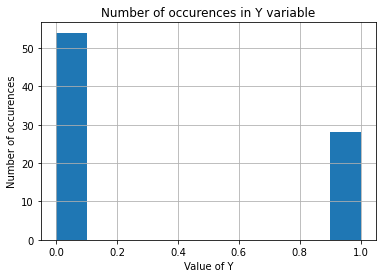

In [4]:
data['Y'].hist()
plt.title('Number of occurences in Y variable')
plt.xlabel('Value of Y')
plt.ylabel('Number of occurences')

resc_count=len(data[data['Y']==1])
n_resc_count=len(data[data['Y']==0])
ratio=(resc_count/n_resc_count)
print('The ration between the positive and negative outcomes of the variable Y is ',round(ratio,3))

The ratio of 0.519 wiil be an important factor in the decision of relevance for certain behaviours between parameters further on.

The following visualizations represent the relation between every parameter and Y.

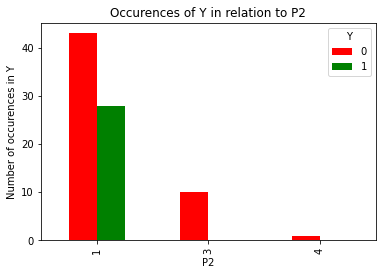

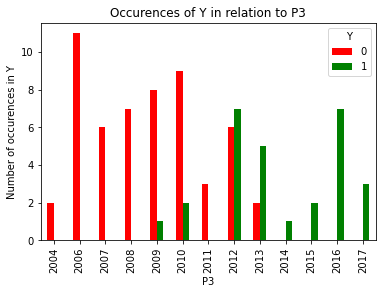

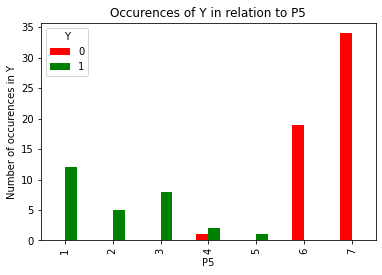

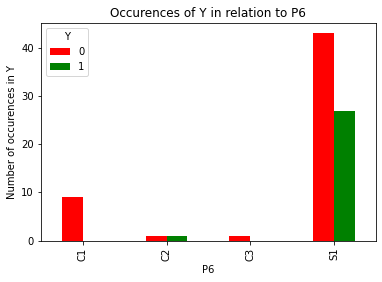

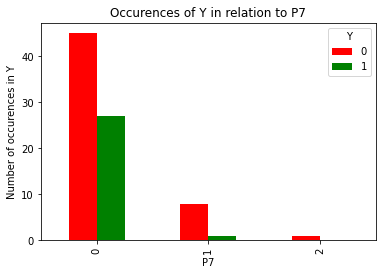

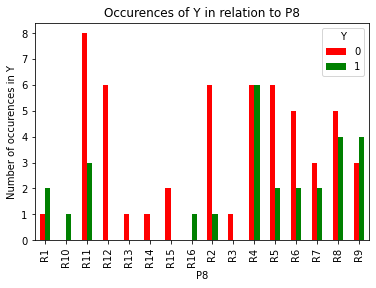

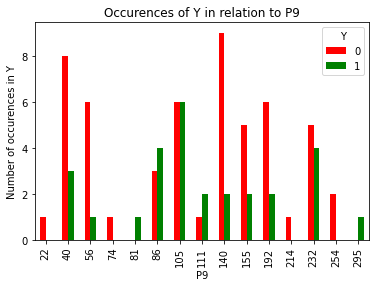

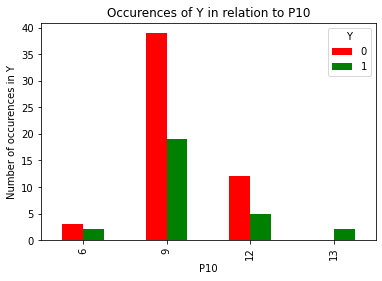

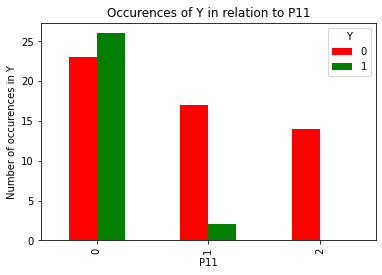

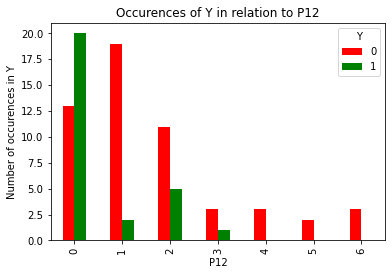

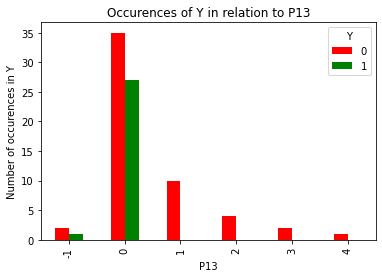

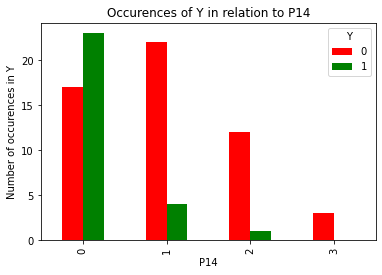

In [5]:
#simple cycle to plot various graphs
for param1 in data.columns:
    if param1 == 'Y':
        break
    else:
        pd.crosstab(data[param1],data['Y']).plot(kind='bar',color=['r','g'])
        plt.title('Occurences of Y in relation to {}'.format(param1))
        plt.xlabel(param1)
        plt.ylabel('Number of occurences in Y')

From brief analysis of these graphs it's observable that:  
 - P2 and Y are highly correlated - the higher the value in P2 the lower the chance of an individual leaving.  
 - P3 and Y are highly correlated - after 2009 individuals started leaving the organziation more frequently.  
 - P5 and Y are highly correlated - after value of P5 hits 4-5 the number of individuals leaving drops considerably.  
 - P6 and Y don't seem to have any relation, for when P6=S1 the ratio of Y occurences is similar to the global mentioned earlier, and the other values of P6 posses too little data to make conclusions.  
 - P7 and Y follow the same logic that P6.  
 - P8 and Y don't seem to posses any correlation.  
 - P8 and P9 exhibit interesting phenomenon - P8 is the residence and P9 is the distance of residence to the organization. Here we see that there is no correlation between distance and the outcome of Y, however, if we examine the residence and outcome of Y we can extract usefull information. In other words, if we look for a tendency, we see none, but if we look at isolated points we see correlation. With this, we see that the distance from residence to the organization is irrelevant, however, the residence is.  
 - P10 doesnt seem to bear any correlation to Y by the same reasons as P6 and P7.  
 - P11 bears strong correlation with Y - the higher the value of P11 the less individuals leave the organization.  
 - P12 has strong correlation to Y.  
 - P13 has strong correlation to Y.  
 - P14 has strong correlation to Y.  
  
With this in mind, we can select the parameters with which we should proceed.

#### 2.3.3. Data Cleaning  
Now, we act upon the results of Exploratory Data Analysis, i.e., we select only the most relevant parameters to proceed.

In [6]:
data_2=data[['P2','P3','P5','P8','P11','P12','P13','P14']]
data_2.head()

,P2,P3,P5,P8,P11,P12,P13,P14
0,1,2009,3,R1,0,2,0,0
1,3,2006,6,R2,0,5,0,3
2,1,2004,6,R3,2,0,4,0
3,3,2006,7,R2,2,1,2,1
4,1,2010,2,R4,0,0,-1,0


Now, we create dummys for the P8 parameter.

In [7]:
cat_vars=['P8']
for var in cat_vars:
    cat_lsit='var'+'_'+var
    cat_list=pd.get_dummies(data_2[var],prefix=var)
    data_3=data_2.join(cat_list)
data_3.drop(columns=['P8'],inplace=True)
data_3.head()

,P2,P3,P5,P11,P12,P13,P14,P8_R1,P8_R10,P8_R11,...,P8_R15,P8_R16,P8_R2,P8_R3,P8_R4,P8_R5,P8_R6,P8_R7,P8_R8,P8_R9
0,1,2009,3,0,2,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3,2006,6,0,5,0,3,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,1,2004,6,2,0,4,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,3,2006,7,2,1,2,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1,2010,2,0,0,-1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


Now we can observe the preliminary results.

Text(0.5, 1.0, 'Correlation between parameters and Y')

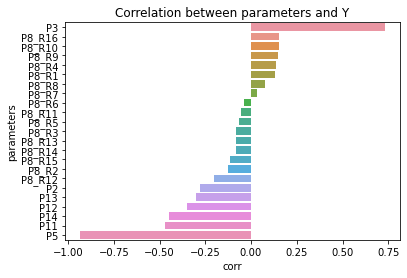

In [8]:
abscorwithdep=[]
for var in data_3.columns:
    abscorwithdep.append((data['Y'].corr(data_3[str(var)])))
    
parameters=data_3.columns.to_list()
corr_table={'parameters':parameters,
           'corr':abscorwithdep}

corr_table_df=pd.DataFrame.from_dict(corr_table)
corr_table_df.dropna(inplace=True)
corr_table_df.sort_values('corr', ascending=False,inplace=True)
#corr_table_df.head()

sns.barplot(x='corr',y='parameters',data=corr_table_df)
plt.title('Correlation between parameters and Y')

We Can now select the more relevant parameters to analyze based on their correlation:  
 - P5, P3, P11, P14, P12, P13

Text(0.5, 1.0, 'Correlation between parameters and Y')

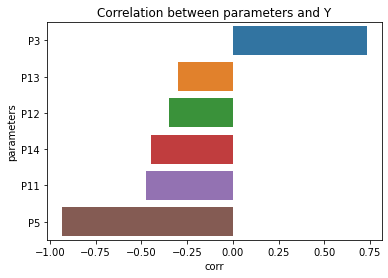

In [9]:
data_4=data[['P3','P5','P11','P12','P13','P14']]
#data_2.head()

abscorwithdep=[]
for var in data_4.columns:
    abscorwithdep.append((data['Y'].corr(data_4[str(var)])))
    
parameters=data_4.columns.to_list()
corr_table={'parameters':parameters,
           'corr':abscorwithdep}

corr_table_df=pd.DataFrame.from_dict(corr_table)
corr_table_df.dropna(inplace=True)
corr_table_df.sort_values('corr', ascending=False,inplace=True)
#corr_table_df.head()

sns.barplot(x='corr',y='parameters',data=corr_table_df)
plt.title('Correlation between parameters and Y')

Now we have the most relevant parameters and how they influence the outcome of the variable Y.  
Now we must examine of there's any correlation between the parameters themselves.

Text(0.5, 1.0, 'Correlation matrix between parameters')

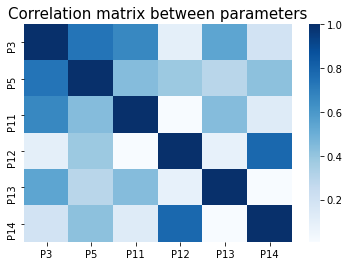

In [10]:
data_4_corr=data_4[['P3','P5','P11','P12','P13','P14']]
correlation_matrix = data_4_corr.corr().abs()
sns.heatmap(correlation_matrix,cmap='Blues')
plt.title('Correlation matrix between parameters',fontsize=15)

From the analysis of the correlation matrix we can drop the following parameters due to the fact that they don't bring in any new information:  
 - P3, P12.

Text(0.5, 1.0, 'Correlation between parameters and Y')

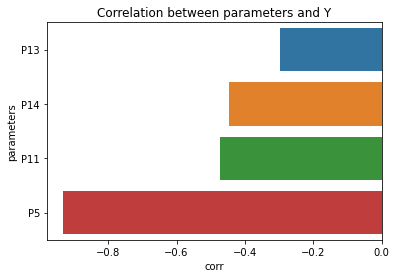

In [11]:
data_5=data_4[['P5','P11','P13','P14']]

abscorwithdep=[]
for var in data_5.columns:
    abscorwithdep.append((data['Y'].corr(data_5[str(var)])))
    
parameters=data_5.columns.to_list()
corr_table={'parameters':parameters,
           'corr':abscorwithdep}

corr_table_df=pd.DataFrame.from_dict(corr_table)
corr_table_df.dropna(inplace=True)
corr_table_df.sort_values('corr', ascending=False,inplace=True)
#corr_table_df.head()

sns.barplot(x='corr',y='parameters',data=corr_table_df)
plt.title('Correlation between parameters and Y')

Now we have the true most relevant parameters and can formulate a strategy of action to retain personell with this information.

#### 2.3.4. Implementation of Logistic Regression  
Due to the requirements of the project was to present the probability of an individual leaving the organization. To achieve this I devided to implement the Logistic Regression Classification Method.  
This implementation consisted of the following steps:  
 - Creation of dummy variables,  
 - Implementation of SMOTE (Synthetic Minoryti Oversampling Technique),  
 - Implementation of Logistic Regression,  
 - Evaluation of the results.

In [14]:
# creation of dummy variables
data_5=pd.get_dummies(data_2, prefix=['P2', 'P3', 'P5', 'P8', 'P11', 'P12', 'P13', 'P14'], columns=['P2', 'P3', 'P5', 'P8', 'P11', 'P12', 'P13', 'P14'])

Implementation of SMOTE

In [35]:
X=data_5
Y=data['Y']

os=SMOTE(random_state=0)
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=0)
columns=X_train.columns

os_data_X,os_data_Y=os.fit_sample(X_train,Y_train)
os_data_X=pd.DataFrame(data=os_data_X,columns=columns)
os_data_Y=pd.DataFrame(data=os_data_Y,columns=['Y'])

print('lenght of oversampled data is',len(os_data_X))
print('lenght of não rescisao in oversampled data',len(os_data_Y[os_data_Y['Y']==0]))
print('proportion of nao rescisao data in oversampled data is ',len(os_data_Y[os_data_Y['Y']==0])/len(os_data_X))
print('proportion of nao rescisao data in oversampled data is ',len(os_data_Y[os_data_Y['Y']==1])/len(os_data_X))

lenght of oversampled data is 78
lenght of não rescisao in oversampled data 39
proportion of nao rescisao data in oversampled data is  0.5
proportion of nao rescisao data in oversampled data is  0.5


array([[<AxesSubplot:title={'center':'Y'}>]], dtype=object)

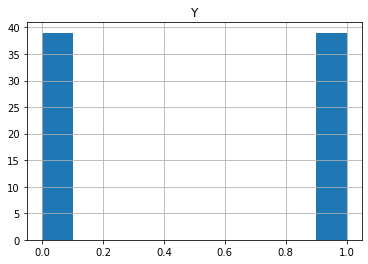

In [36]:
os_data_Y.hist()

As we can see, the data is now balanced.  
Now we implement the Logistic Regression.

In [37]:
logreg=LogisticRegression()
logreg.fit(os_data_X,os_data_Y)

C:\Users\Pc\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LogisticRegression()

In [38]:
# Train the model
y_pred=logreg.predict(X_test)

In [39]:
from sklearn.metrics import confusion_matrix
confusion_matrix=confusion_matrix(Y_test,y_pred)
print(confusion_matrix)

[[15  0]
 [ 2  4]]


In [40]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      1.00      0.94        15
           1       1.00      0.67      0.80         6

    accuracy                           0.90        21
   macro avg       0.94      0.83      0.87        21
weighted avg       0.92      0.90      0.90        21



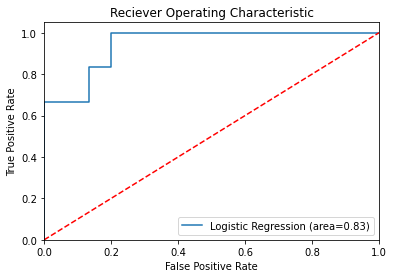

In [41]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc=roc_auc_score(Y_test,logreg.predict(X_test))
fpr,tpr,thresholds=roc_curve(Y_test,logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr,tpr,label='Logistic Regression (area=%0.2f)' % logit_roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Reciever Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

## 3. Results  

### 3.1. Determination of the most relevant parameters in personnel retention  
From Exploratory Data Analysis we have obtained the most relevant parameters in personnel retention.

Text(0.5, 1.0, 'Correlation between parameters and Y')

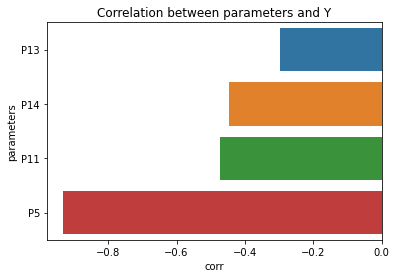

In [42]:
sns.barplot(x='corr',y='parameters',data=corr_table_df)
plt.title('Correlation between parameters and Y')

### 3.2. Classification Algorithm  
The classification algorithm through Logistic Regression that was developed yielded the following results

In [44]:
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      1.00      0.94        15
           1       1.00      0.67      0.80         6

    accuracy                           0.90        21
   macro avg       0.94      0.83      0.87        21
weighted avg       0.92      0.90      0.90        21



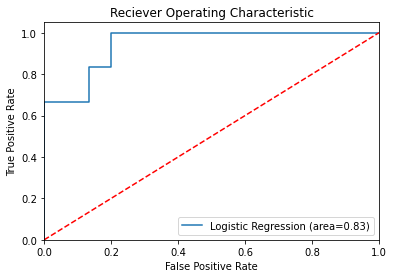

In [45]:
plt.figure()
plt.plot(fpr,tpr,label='Logistic Regression (area=%0.2f)' % logit_roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Reciever Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

## 4. Conclusion  
With this project we have now the following:  
 - Information on the most relevant parameters in personnel retention which can be used to formulate a plan of action to increase retention power,  
 - Classification algorithm that can return the probability of an individual leaving the organization.  

The organization for which this project was developed gained the information to allow them to increase their retention power and an algorithm to allow for prediction. With this information and tool, a strategy can be developed and implemented to improve the effectiveness of the organization.

## 5. Final Thoughts  
This approach has great value in improving personnel retention not only in the organization for which it was developed, but also for any organization. When we speak of personnel retention, we also speak to client retention which has great application in many industries.